In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Exercise 1

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.array([0, 0], dtype=np.float32)
iterations = 10000
alpha = 0.01
costs = []

In [3]:
for it in range(iterations):
    h = []
    crossentropy = []
    for i in range(len(X)):
        h.append(1/(1 + np.exp(-theta[0] - theta[1]*X[i])))
        crossentropy.append(-y[i]*np.log(h[-1]) - (1 - y[i])*np.log(1 - h[-1]))
    costs.append(np.sum(crossentropy)/len(X))
    theta0Deriv = np.sum(h - y)/len(y)
    theta1Deriv = np.sum((h - y)*X)
    theta[0] = theta[0] - alpha*theta0Deriv
    theta[1] = theta[1] - alpha*theta1Deriv

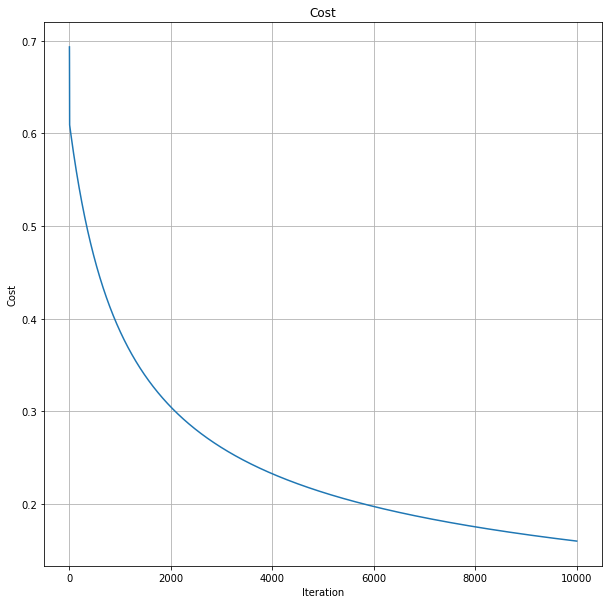

In [4]:
plt.figure(figsize = [10, 10])
plt.title("Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(costs)
plt.grid()
plt.show()

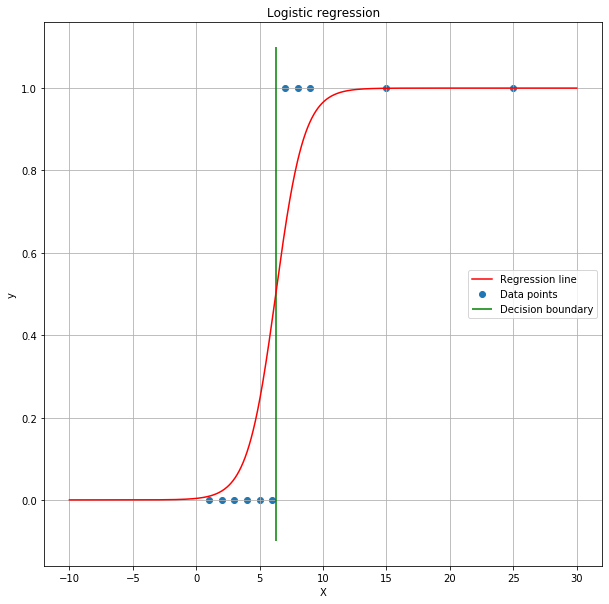

In [5]:
plt.figure(figsize = [10, 10])
plt.title("Logistic regression")
plt.scatter(X, y)
xx = np.linspace(-10, 30, 1000)
plt.plot(xx, 1/(1 + np.exp(-theta[0] - theta[1] * xx)), color = 'red')
decisionBoundary = -theta[0]/theta[1]
plt.vlines(decisionBoundary, -0.1, 1.1, color = 'green')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Regression line', 'Data points', 'Decision boundary'], loc = 'center right')
plt.grid()
plt.show()

In [6]:
#Exercise 2

X = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1,  1,  1], # bias' 'variables' already appended to X
              [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25],
              [13, 9, 8, 6, 4, 2, 1, 0, 3,  4,  2]], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.zeros((X.shape[0], 1))

max_iter = 5000
alpha = 0.05
prev_cost = 99
costs = []

for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta.T@X))
    crossentropy = -y*np.log(h_x+0.00001) - (1-y)*np.log(1-h_x+0.00001)
    [cost] = np.sum(crossentropy, axis=1) / X.shape[1]
    theta_derivs = sum((h_x-y) @ X.T) / X.shape[1]
    theta_derivs.shape = [len(theta_derivs), 1]
    theta = theta - alpha*theta_derivs
    costs.append(cost)
    prev_cost = cost

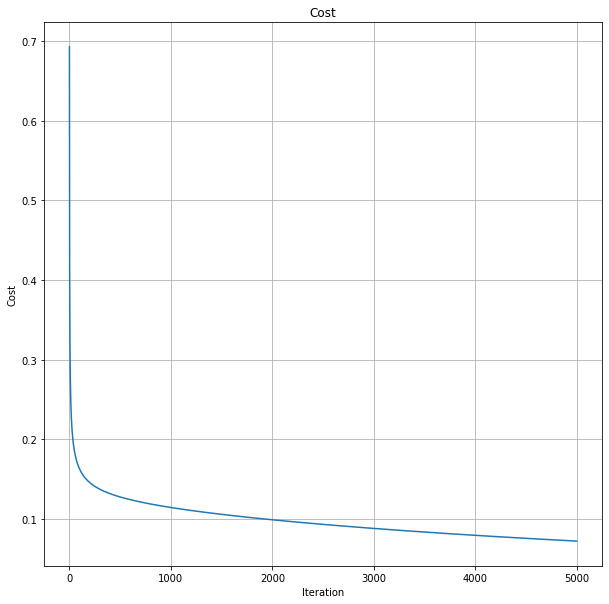

In [7]:
plt.figure(figsize = [10, 10])
plt.title("Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(costs)
plt.grid()
plt.show()

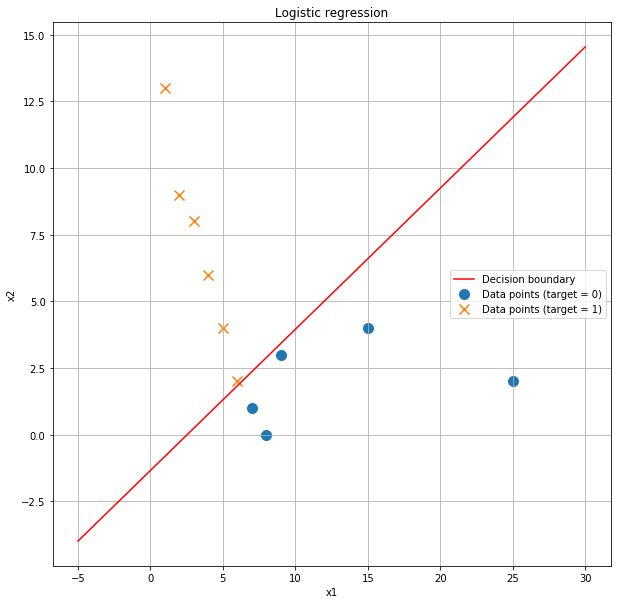

In [8]:
plt.figure(figsize = [10, 10])
plt.title("Logistic regression")
XPositive = X[:, y[:] == 1]
XNegative = X[:, y[:] == 0]
plt.scatter(np.asarray(XPositive[1]), np.asarray(XPositive[2]), marker = 'o', s = 100)
plt.scatter(np.asarray(XNegative[1]), np.asarray(XNegative[2]), marker = 'x', s = 100)
xx = np.linspace(-5, 30, 1000)
plt.plot(xx, -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*xx, color = 'red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Decision boundary', 'Data points (target = 0)', 'Data points (target = 1)'], loc = 'center right')
plt.grid()
plt.show()

In [12]:
#Exercise 3

import pandas as pd
data = pd.read_csv('.\data.txt', names = ['x1', 'x2', 'y'])

In [51]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(data[['x1', 'x2']], data['y'], test_size = 0.3)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(XTrain, yTrain)
preds = model.predict(XTest)
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(preds)):
    if preds[i] == 1 and yTest.values[i] == 1:
        tp += 1
    elif preds[i] == 1 and yTest.values[i] == 0:
        fp += 1
    elif preds[i] == 0 and yTest.values[i] == 0:
        tn += 1
    elif preds[i] == 0 and yTest.values[i] == 1:
        fn += 1
yPos = []
yNeg = []
for y in yTest:
    if y == 0:
        yNeg.append(y)
    else:
        yPos.append(y)
tp = tp/len(yPos)
fp = fp/len(yNeg)
tn = tn/len(yNeg)
fn = fn/len(yPos)
print('True positive: {0:.2f}\nFalse positive: {1:.2f}\nTrue negative: {2:.2f}\nFalse negative: {3:.2f}'.format(
     tp, fp, tn, fn))

True positive: 1.00
False positive: 0.36
True negative: 0.64
False negative: 0.00


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
precision = tp/(tp + fp)
recall = tp/(tp + fn)
specificity = tn/(tn + fp)
negPred = tn/(tn + fn)
print('Precision: {0:.2f}\nRecall: {1:.2f}\nSpecificity: {2:.2f}\nNegative predictivity: {3:.2f}'.
     format(precision, recall, specificity, negPred))

Precision: 0.68
Recall: 1.00
Specificity: 0.38
Negative predictivity: 1.00
